In [1]:
import os
os.chdir('../')

In [2]:
from src import util

In [3]:
# importing the module
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [4]:
path_base = 'data'

In [5]:
path_data = util.list_list(path_base, '')

In [6]:
path_data

['data/goa-drone.png',
 'data/.DS_Store',
 'data/modi_neeraj_chopra.jpg',
 'data/profile-pic copy.jpeg',
 'data/photo_2021-05-24 23.51.14.jpeg',
 'data/profile-pic.jpeg',
 'data/goa-drone copy.png',
 'data/modi_sindhu.jpg',
 'data/photo_2021-05-24 23.51.14 copy.jpeg',
 'data/modi_sindhu copy.jpg',
 'data/modi_neeraj_chopra copy.jpg',
 'data/modi_sindhu copy 2.jpg',
 'data/modi_sindhu copy 3.jpg']

In [7]:
img = Image.open(path_data[0])

In [8]:
np.array(img).shape

(1080, 1920, 3)

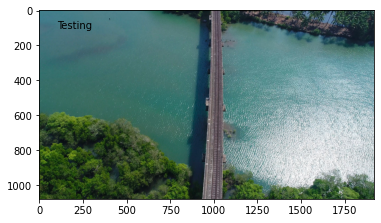

In [9]:
fig = plt.figure()
plt.text(100, 100, 'Testing')
plt.imshow(img)

In [10]:
from PIL import features

In [11]:
print(features.check("raqm"))

False


In [26]:
from PIL import Image, ImageDraw, ImageFont

In [27]:
img = Image.open(path_data[0])

In [28]:
font = ImageFont.truetype("src/Lohit-Devanagari.ttf", 40, layout_engine=ImageFont.LAYOUT_RAQM)

In [25]:
text1 = 'क्या भाई क्या चल रहा है'

In [29]:
d1 = ImageDraw.Draw(img)

In [30]:
d1.text((100, 100),
        text1, font=font, 
        stroke_width=1)

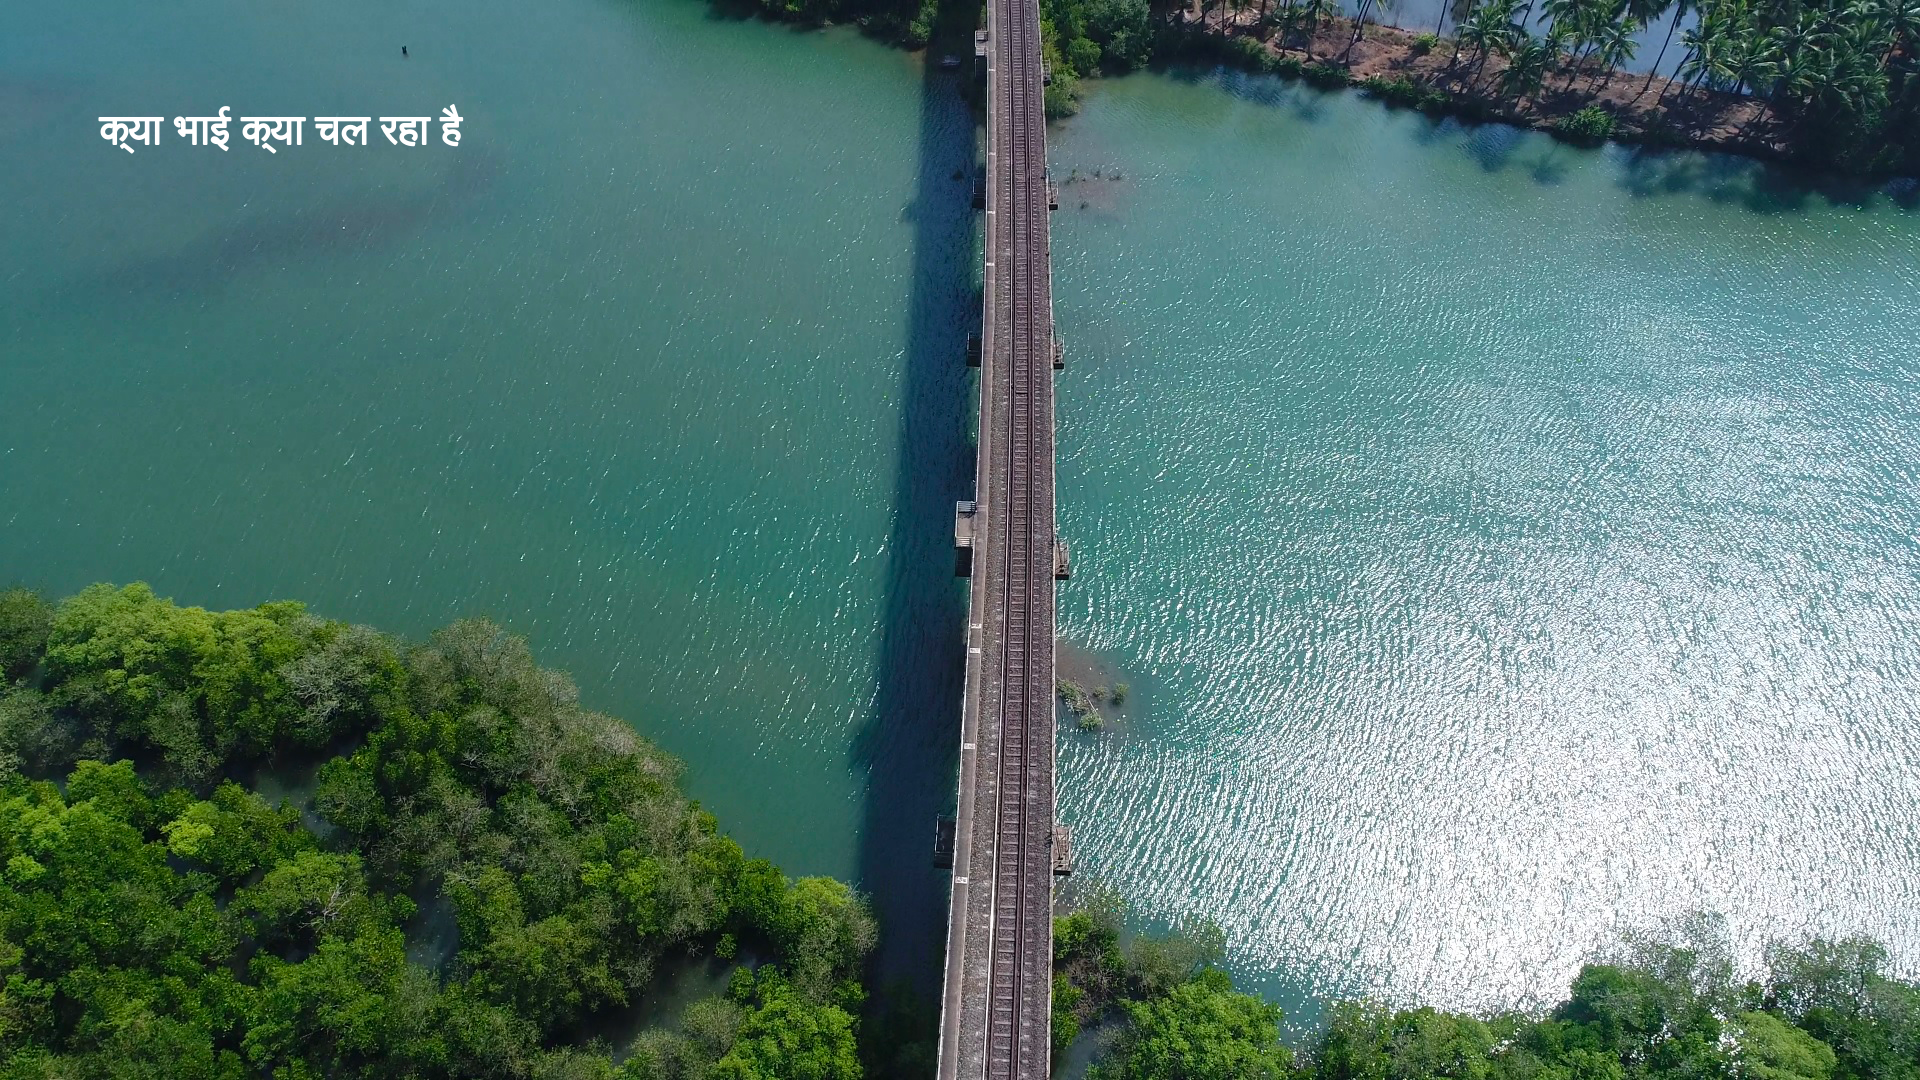

In [31]:
img

In [11]:
# function to display the coordinates of
# of the points clicked on the image 
def click_event(event, x, y, flags, params):
  
    # checking for left mouse clicks
    if event == cv2.EVENT_LBUTTONDOWN:
  
        # displaying the coordinates
        # on the Shell
        print(x, ' ', y)
  
        # displaying the coordinates
        # on the image window
        font = cv2.FONT_HERSHEY_SIMPLEX
        img = cv2.rectangle(img, start_point, end_point, color, thickness)
        cv2.imshow('image', img)
  
    # checking for right mouse clicks     
    if event==cv2.EVENT_RBUTTONDOWN:
  
        # displaying the coordinates
        # on the Shell
        print(x, ' ', y)
  
        # displaying the coordinates
        # on the image window
        font = cv2.FONT_HERSHEY_SIMPLEX
        b = img[y, x, 0]
        g = img[y, x, 1]
        r = img[y, x, 2]
        cv2.putText(img, str(b) + ',' +
                    str(g) + ',' + str(r),
                    (x,y), font, 1,
                    (255, 255, 0), 2)
        cv2.imshow('image', img)


In [12]:
# reading the image
img = cv2.imread(path_data[0], 1)

# displaying the image
cv2.imshow('image', img)

# setting mouse hadler for the image
# and calling the click_event() function
cv2.setMouseCallback('image', click_event)

# wait for a key to be pressed to exit
cv2.waitKey(0)

# close the window
cv2.destroyAllWindows()

169   119


In [1]:
# Draw a complete line with the mouse
import cv2
import numpy as np

RED = (0, 0, 255)
p0, p1 = (100, 30), (400, 90)

def mouse(event, x, y, flags, param):
    global p0, p1
    
    if event == cv2.EVENT_LBUTTONDOWN:
        p0 = x, y
        p1 = x, y

    elif event == cv2.EVENT_MOUSEMOVE and flags == 1:
        p1 = x, y

    elif event == cv2.EVENT_LBUTTONUP:
        p1 = x, y

    img[:] = 0
    cv2.rectangle(img, p0, p1, RED, 2)
    cv2.imshow('window', img)
    

img = np.zeros((100, 500, 3), np.uint8)
cv2.imshow('window', img)
cv2.setMouseCallback('window', mouse)

cv2.waitKey(0)
cv2.destroyAllWindows()

### Conneting Dataset

In [ ]:
public_gsheets_url = "https://docs.google.com/spreadsheets/d/1lHi_WU777tFmskQVGwGJOq0eFCKs3VjpiSU6KH_mx8U/edit?usp=sharing"

In [79]:
import io
import s3fs
from gsheetsdb import connect

In [68]:
# Create a connection object.
conn = connect()
fs = s3fs.S3FileSystem(anon=False)

In [50]:
# Perform SQL query on the Google Sheet.
# Uses st.cache to only rerun when the query changes or after 10 min.
def run_query(query):
    rows = conn.execute(query, headers=1)
    return rows

In [56]:
sheet_url = public_gsheets_url
rows = run_query(f'SELECT * FROM "{sheet_url}"')

In [63]:
row.image_path

's3://meme-generator-streamlit/rahul_gandhi_9.jpg'

In [71]:
def read_file(filename):
    with fs.open(filename) as f:
        return f.read()

In [72]:
img = read_file('meme-generator-streamlit/rahul_gandhi_9.jpg')

In [78]:
type(img)

bytes

In [88]:
path_s3 = 's3://meme-generator-streamlit/amit_shah_1.jpg'

In [59]:
for row in rows:
    print(row)

Row(image_title='amit_shah_1', image_path='s3://meme-generator-streamlit/amit_shah_1.jpg', Description='Amit shah using computer')
Row(image_title='amit_shah_2', image_path='s3://meme-generator-streamlit/amit_shah_2.jpg', Description='Amit shah is here pointing')
Row(image_title='amit_shah_3', image_path='s3://meme-generator-streamlit/amit_shah_3.jpg', Description='amit shah sitting on sofa')
Row(image_title='arvind_kejriwal_1', image_path='s3://meme-generator-streamlit/arvind_kejriwal_1.jpg', Description=None)
Row(image_title='arvind_kejriwal_2', image_path='s3://meme-generator-streamlit/arvind_kejriwal_2.jpg', Description=None)
Row(image_title='arvind_kejriwal_3', image_path='s3://meme-generator-streamlit/arvind_kejriwal_3,jpg', Description=None)
Row(image_title='arvind_kejriwal_4', image_path='s3://meme-generator-streamlit/arvind_kejriwal_4.jpg', Description=None)
Row(image_title='arvind_kejriwal_5', image_path='s3://meme-generator-streamlit/arvind_kejriwal_5.jpg', Description=None)